# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [6]:
T = int(input("Input desired time (in seconds) that it takes for the satellite to orbit the planet: "))

Input desired time (in seconds) that it takes for the satellite to orbit the planet: 86400


In [7]:
import math

G = 6.67 * (10**(-11))
M = 5.97 * 10**((24))
R = 6371000

h = (((G*M*((T)**2))/(4*((math.pi)**2)))**(1/3))-R

print("The altitude of the satellite from the earths surface is " + str(h) + " meters")

The altitude of the satellite from the earths surface is 35855910.17617497 meters


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [8]:
T = int(input("Input desired time (in seconds) that it takes for the satellite to orbit the planet: "))

import math

G = 6.67 * (10**(-11))
M = 5.97 * 10**((24))
R = 6371000

h = (((G*M*((T)**2))/(4*((math.pi)**2)))**(1/3))-R

print("The altitude of the satellite from the earths surface is " + str(h) + " meters")

Input desired time (in seconds) that it takes for the satellite to orbit the planet: 5400
The altitude of the satellite from the earths surface is 279321.62537285965 meters


In [9]:
T = int(input("Input desired time (in seconds) that it takes for the satellite to orbit the planet: "))

import math

G = 6.67 * (10**(-11))
M = 5.97 * 10**((24))
R = 6371000

h = (((G*M*((T)**2))/(4*((math.pi)**2)))**(1/3))-R

print("The altitude of the satellite from the earths surface is " + str(h) + " meters")

Input desired time (in seconds) that it takes for the satellite to orbit the planet: 2700
The altitude of the satellite from the earths surface is -2181559.8978108233 meters


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [11]:
#The solar day is how long it takes for the Earth to rotate such that the Sun appears in the same spot in the sky, again.
#It takes the Earth 24 hours to do that. But the earth also rotates around the Sun. 
#Geosynchronous satellite doesn’t care about the apparent position of the Sun from the Earth’s surface. 
#That satellite cares about being over a fixed point on Earth. 
#If it takes the Earth 23.93 hours to rotate 360 degrees, 
#then the geostationary orbit must also be 23.93 hours long. 

T = int(input("Input desired time (in seconds) that it takes for the satellite to orbit the planet: "))

import math

G = 6.67 * (10**(-11))
M = 5.97 * 10**(24)
R = 6371000

h = (((G*M*((T)**2))/(4*((math.pi)**2)))**(1/3))-R

print("The altitude of the satellite from the earths surface is " + str(h) + " meters")

Input desired time (in seconds) that it takes for the satellite to orbit the planet: 86160
The altitude of the satellite from the earths surface is 35777675.94683055 meters


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

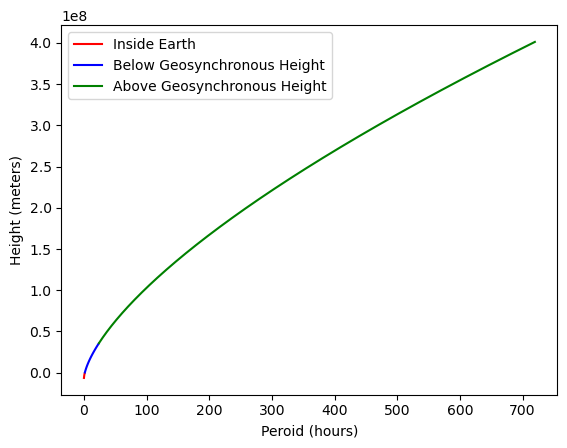

In [17]:
from pylab import plot, xlabel, ylabel, show, legend
import matplotlib.pyplot as plt 
from math import pi

G = 6.67 * (10**(-11))
M = 5.97 * 10**(24)
R = 6371000

def calc_altitude(T):
    h = (((G*M*((T*60)**2))/(4*((pi)**2)))**(1/3))-R
    return h

inearth_times = []
inearth_altitude = []
belowg_times = []
belowg_altitude = []
aboveg_times = []
aboveg_altitude = []

for i in range (int(24*30/0.5)):
    h = calc_altitude(i*0.5*60)
    
    if h <= 0:
        inearth_altitude.append(h)
        inearth_times.append(i*0.5)
    elif h <= calc_altitude(23.93*60):
        belowg_altitude.append(h)
        belowg_times.append(i*0.5)
    else:
        aboveg_altitude.append(h)
        aboveg_times.append(i*0.5)


plot(inearth_times, inearth_altitude, 'r') #label='below ground', markersize=3)
plot(belowg_times, belowg_altitude, 'b') #label='above ground but less than geosynchronous', markersize=3)
plot(aboveg_times, aboveg_altitude, 'g') #label='greater than geosynchtonous', markersize=3)
xlabel('Peroid (hours)')
ylabel('Height (meters)')
legend(["Inside Earth", "Below Geosynchronous Height", "Above Geosynchronous Height"])




### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [15]:
c = 2.99792458*(10**(8))
x = float(input("Input distance (in light years) that the Earth is from the other planet: "))
v = float(input("Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: "))


import math

gamma = 1/(math.sqrt(1-((v**2)/(1**2))))
t = x/v
#x_prime = x/gamma
#t_prime = x_prime/v
t_prime = gamma*(t-((v*x)/(1**2)))

print("Observing from the earth it took " + str(t) + " years.")
print("Passengers on board the ship perceived to take " + str(t_prime) + " years.")

Input distance (in light years) that the Earth is from the other planet: 10
Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: 0.9
Observing from the earth it took 11.11111111111111 years.
Passengers on board the ship perceived to take 4.843221048378526 years.


In [4]:
c = 2.99792458*(10**(8))
x = float(input("Input distance (in light years) that the Earth is from the other planet: "))
v = float(input("Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: "))


import math

gamma = 1/(math.sqrt(1-((v**2)/(1**2))))
t = x/v
#x_prime = x/gamma
#t_prime = x_prime/v
t_prime = gamma*(t-((v*x)/(1**2)))

print("Observing from the earth it took " + str(t) + " years.")
print("Passengers on board the ship perceived to take " + str(t_prime) + " years.")

Input distance (in light years) that the Earth is from the other planet: 10
Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: 0.98
Observing from the earth it took 10.204081632653061 years.
Passengers on board the ship perceived to take 2.0305866063400337 years.


In [5]:
c = 2.99792458*(10**(8))
x = float(input("Input distance (in light years) that the Earth is from the other planet: "))
v = float(input("Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: "))


import math

gamma = 1/(math.sqrt(1-((v**2)/(1**2))))
t = x/v
#x_prime = x/gamma
#t_prime = x_prime/v
t_prime = gamma*(t-((v*x)/(1**2)))

print("Observing from the earth it took " + str(t) + " years.")
print("Passengers on board the ship perceived to take " + str(t_prime) + " years.")

Input distance (in light years) that the Earth is from the other planet: 10
Input value of the relativistic speed that the spaceship travels from Earth as a fraction of the speed of light: 0.999
Observing from the earth it took 10.01001001001001 years.
Passengers on board the ship perceived to take 0.4475493274496109 years.


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

What is the velocity as a fraction of the speed of light? .9
How far are you traveling in light years? 10
Observing from Earth it took 11.11 years.
Passengers on board the ship percieved to take 4.84 years.
What is the velocity as a fraction of the speed of light? .98
How far are you traveling in light years? 10
Observing from Earth it took 10.2 years.
Passengers on board the ship percieved to take 2.03 years.
What is the velocity as a fraction of the speed of light? .999
How far are you traveling in light years? 10
Observing from Earth it took 10.01 years.
Passengers on board the ship percieved to take 0.45 years.


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [6]:
a = float(input("Input a value "))
b = float(input("Input b value "))
c = float(input("Input c value "))

import math
x1 = (-b + math.sqrt((b**2)-4*a*c))/(2*a)
x2 = (-b - math.sqrt((b**2)-4*a*c))/(2*a)

print("The first root for x is x = " + str(x1))
print("The second root for x is x = " + str(x2))

Input a value 0.001
Input b value 1000
Input c value 0.001
The first root for x is x = -9.999894245993346e-07
The second root for x is x = -999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [12]:
a = float(input("Input a value "))
b = float(input("Input b value "))
c = float(input("Input c value "))

import math

x1 = (-b + math.sqrt((b**2)-4*a*c))/(2*a)
x2 = (-b - math.sqrt((b**2)-4*a*c))/(2*a)
x3 = (2*c)/(-b - math.sqrt((b**2)-4*a*c))
x4 = (2*c)/(-b + math.sqrt((b**2)-4*a*c))

print("Given the first equation, the two roots are " + str(x1) + " and " + str(x2))
print("Given the second equation, the two roots are " + str(x3) + " and " + str(x4))
print("The correct roots are " + str(x3) + " and " + str(x2))

Input a value 0.001
Input b value 1000
Input c value 0.001
Given the first equation, the two roots are -9.999894245993346e-07 and -999999.999999
Given the second equation, the two roots are -1.000000000001e-06 and -1000010.5755125057
The correct roots are -1.000000000001e-06 and -999999.999999


The two roots are -1.000000000001e-06 and -999999.999999
The two roots are -1e-08 and -100000000.0
The two roots are 2.0 and 1.0


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [2]:
import math
l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))
l2 = float(input("Enter the the distance of the planet at it's most distant point in meters: "))
v2 = (l1*v1)/l2
a = 0.5*(l1 + l2)
b = math.sqrt(l1*l2)
T = (2*(math.pi)*a*b)/(l1*(v1))*(1/(60*60*24*365))
e = (l2 - l1)/(l2 + l1)

print("v2 = " + str(v2))
print("a = " + str(a) + " meters")
print("b = " + str(b) + " meters")
print("T = " + str(T) + " years")
print("e = " + str(e))

Enter the perihelion in meters: 147100000000
Enter the velocity at perihelion in m/s: 30287
Enter the the distance of the planet at it's most distant point in meters: 152203426488.95538
v2 = 29271.467816286593
a = 149651713244.4777 meters
b = 149629957015.71707 meters
T = 1.0013930557484005 years
e = 0.017051012575506567


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
l2 = 152203426488.95538 meters
v2 = 29271.467816286593 m/s
a = 149651713244.4777 meters
b = 149629957015.71707 meters
T = 1.0013930557484005 years
e = 0.017051012575506567


In [3]:
import math
l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))
l2 = float(input("Enter the the distance of the planet at it's most distant point in meters: "))
v2 = (l1*v1)/l2
a = 0.5*(l1 + l2)
b = math.sqrt(l1*l2)
T = (2*(math.pi)*a*b)/(l1*(v1))*(1/(60*60*24*365))
e = (l2 - l1)/(l2 + l1)

print("v2 = " + str(v2))
print("a = " + str(a) + " meters")
print("b = " + str(b) + " meters")
print("T = " + str(T) + " years")
print("e = " + str(e))

Enter the perihelion in meters: 87830000000
Enter the velocity at perihelion in m/s: 54529
Enter the the distance of the planet at it's most distant point in meters: 5472738862158.555
v2 = 875.1161330052963
a = 2780284431079.2773 meters
b = 693304157108.1093 meters
T = 80.18919937477547 years
e = 0.9684097069284723
